In [1]:
# Use Autoencoder to implement anomaly detection. Build the model by using:
# a. Import required libraries
# b. Upload / access the dataset
# c. Encoder converts it into latent representation
# d. Decoder networks convert it back to the original input
# e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [84]:
# a. Import required libraries

import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [89]:
df = pd.read_csv(r"C:/Users/Acer/Downloads/dataset/creditcardfraud-csv/creditcard.csv")

In [90]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [91]:
scaler = StandardScaler()

x = scaler.fit_transform(df.drop("Class", axis = 1))
y = df["Class"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [69]:
input_dem = x_train.shape[1]
print(input_dem)

30


In [23]:
# c. Encoder converts it into latent representation

encoder = keras.Sequential([
    keras.Input(shape= input_dem),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu')
])

In [28]:
# d. Decoder networks convert it back to the original input

decoder = keras.Sequential([
    keras.layers.Input(shape = (16)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(input_dem, activation='linear')
])

In [29]:
# e. Compile the models with Optimizer, Loss, and Evaluation Metrics

model = keras.Sequential([
    encoder,
    decoder
])

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
6676/6676 [==============================] - 17s 2ms/step - loss: 0.0014 - val_loss: 6.8312e-04
Epoch 2/5
6676/6676 [==============================] - 17s 3ms/step - loss: 6.3157e-04 - val_loss: 6.6817e-04
Epoch 3/5
6676/6676 [==============================] - 17s 3ms/step - loss: 6.0076e-04 - val_loss: 5.6787e-04
Epoch 4/5
6676/6676 [==============================] - 17s 3ms/step - loss: 5.9039e-04 - val_loss: 5.8468e-04
Epoch 5/5
6676/6676 [==============================] - 17s 2ms/step - loss: 5.4534e-04 - val_loss: 5.4665e-04


In [32]:
y_predict = model.predict(x_test)

2226/2226 [==============================] - 3s 2ms/step


In [34]:
import numpy as np

mse = np.mean(np.power(x_test - y_predict, 2), axis=1)
print(mse)

[72.9020555   1.06129471  0.54398863 ...  0.51474883  0.32889784
  0.47625456]


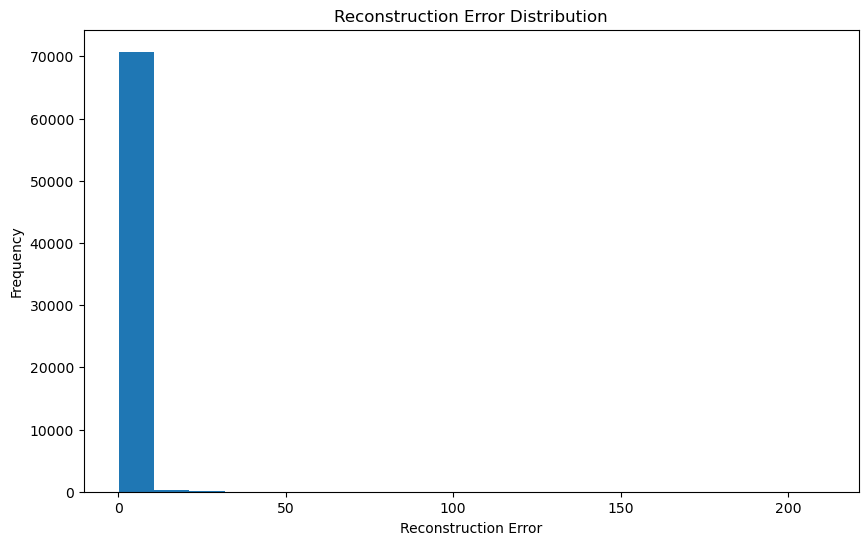

In [73]:
# Visualize the reconstruction error distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=20)
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution")
plt.show()

In [77]:
# Threshold tuning (iterate and adjust as needed)
thresholds = np.arange(0.1, 1.0, 0.1)  # Adjust the step size as needed

for threshold in thresholds:
    anomalies = mse > threshold
    



In [78]:
# Count the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Threshold: {threshold:.1f}, Number of anomalies: {num_anomalies}")

Threshold: 0.9, Number of anomalies: 18012


In [79]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and anomalies are your true labels and predicted labels
confusion = confusion_matrix(y_test, anomalies)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[53187 17902]
 [    3   110]]


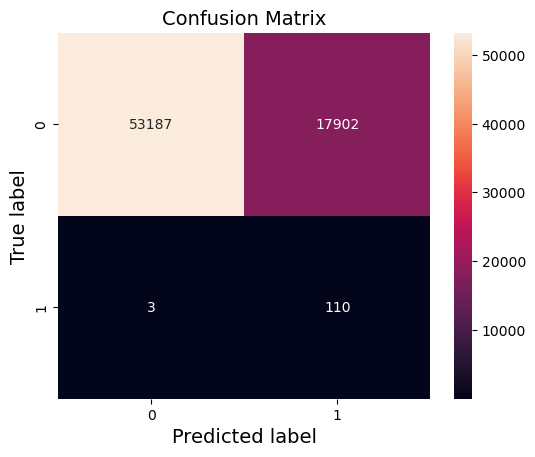

In [83]:
import seaborn as sns
plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(y_test, anomalies), annot = True, fmt = 'd')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.show()